In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.append('/jbk001-data1/git/SuperPnP/')

import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [11]:
outs_dict = torch.load('inference_outs.pth')

outs_dict['superflow_correspondences'].shape, outs_dict['keypoints'][0].shape

((16, 4), (401, 3))

In [12]:
cat_images = np.concatenate([ outs_dict['inputs']['image1'],  outs_dict['inputs']['image2']], axis=0)
correspondences = outs_dict['superpoint_keypoint_correspondences'].squeeze()

h, w = cat_images.shape[0] / 2, cat_images.shape[1] / 2

correspondences[:10], h, w

(array([[323.     , 154.     , 322.79773, 152.47562],
        [393.     , 128.     , 394.359  , 126.32426],
        [564.     , 153.     , 575.31396, 153.0048 ],
        [238.     , 130.     , 232.6004 , 128.55954],
        [362.     , 149.     , 363.0864 , 147.11227],
        [363.     , 130.     , 364.358  , 128.14517],
        [201.     , 105.     , 193.71115, 102.8477 ],
        [232.     , 147.     , 226.2935 , 146.11996],
        [237.     , 111.     , 231.5867 , 109.07087],
        [605.     , 200.     , 624.9184 , 204.76   ]], dtype=float32),
 256.0,
 416.0)

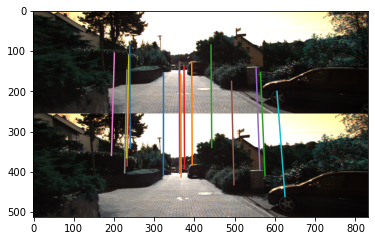

In [14]:
plt.imshow(cat_images, aspect='equal')

for i in range(correspondences.shape[0]):
    plt.plot([correspondences[i][0], correspondences[i][2]], [correspondences[i][1], correspondences[i][3] + h])

plt.savefig('correspondence_out.png')